In [250]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In [3]:
df = pd.read_csv('kwhh_sum_by_month.csv')


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
month    28 non-null object
kwhh     28 non-null float64
dtypes: float64(1), object(1)
memory usage: 520.0+ bytes


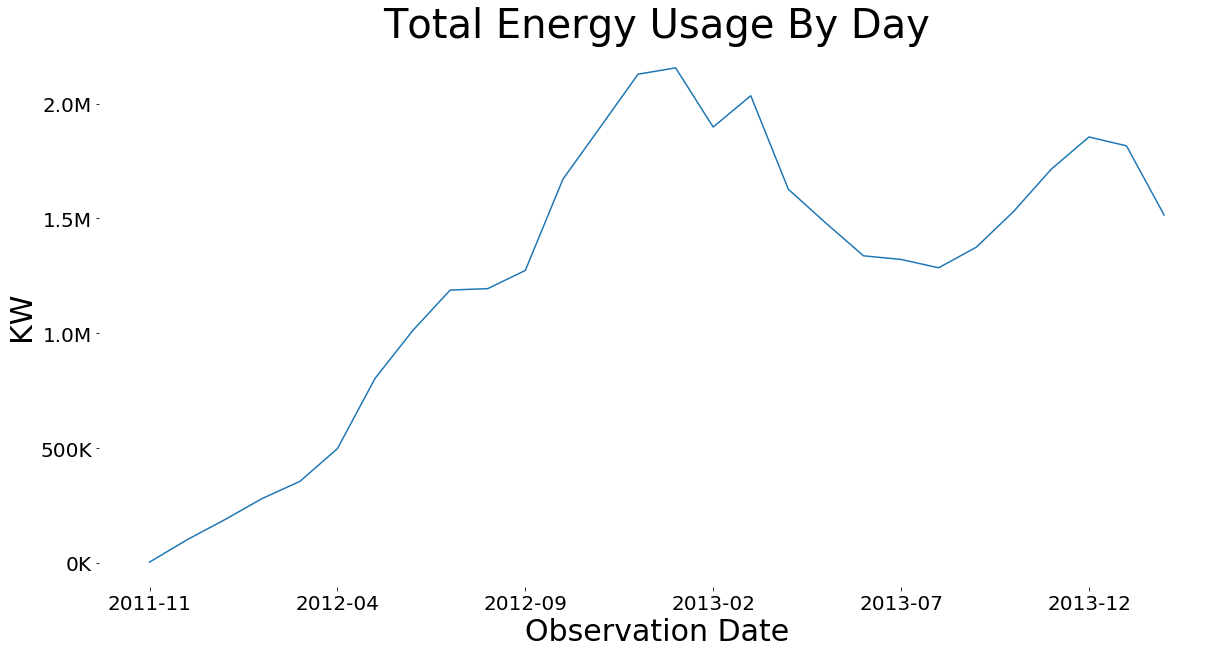

In [41]:

def makeabbrev(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '{:1.1f}M'.format(x*1e-6)
    return '{:1.0f}K'.format(x*1e-3)
formatter = FuncFormatter(makeabbrev)

ax = df.plot(x='month',figsize=(20,10),legend=False)
ax.yaxis.set_major_formatter(formatter)  # set formatter to needed axis
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xlabel('Observation Date', size =30)
plt.ylabel('KW', size = 30)
plt.title('Total Energy Usage By Day', size = 40)
plt.xticks(size = 20)
plt.yticks(size = 20)    
plt.show()

In [43]:
df.sort_values('kwhh',ascending=False)


,month,kwhh
14,2013-01,2.155819e+06
13,2012-12,2.128482e+06
16,2013-03,2.034698e+06
12,2012-11,1.899065e+06
15,2013-02,1.898281e+06
25,2013-12,1.854907e+06
26,2014-01,1.816361e+06
24,2013-11,1.715174e+06
11,2012-10,1.670734e+06
17,2013-04,1.627334e+06


In [393]:
#jan2014 = pd.read_csv('london-weather-2014-01.txt',parse_dates=['datetime'], skip_blank_lines=True)
jan2013 = pd.read_csv('london-weather-2013-01.txt',parse_dates=['datetime'])
jan2012 = pd.read_csv('london-weather-2012-01.txt',parse_dates=['datetime'])

In [394]:
jan2013.info()
jan2013.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 13 columns):
temp            360 non-null float64
dewPoint        360 non-null float64
precipType      360 non-null object
cloudCover      360 non-null float64
summary         360 non-null object
apparentTemp    360 non-null float64
pressure        360 non-null float64
windSpeed       360 non-null float64
visibility      360 non-null float64
datetime        360 non-null datetime64[ns]
windBearing     360 non-null int64
humidity        360 non-null float64
icon            360 non-null object
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 36.6+ KB


,temp,dewPoint,precipType,cloudCover,summary,apparentTemp,pressure,windSpeed,visibility,datetime,windBearing,humidity,icon
0,6.91,2.53,rain,0.31,Partly Cloudy,3.52,1008.18,12.31,8.10,2013-01-01 00:00:00,269,0.74,partly-cloudy-night
1,7.14,1.77,rain,0.31,Partly Cloudy,3.71,1009.45,12.86,8.29,2013-01-01 02:00:00,274,0.69,partly-cloudy-night
2,6.09,1.58,rain,0.31,Partly Cloudy,3.07,1010.71,9.48,8.29,2013-01-01 04:00:00,259,0.73,partly-cloudy-night
3,5.55,1.62,rain,0.31,Partly Cloudy,2.16,1012.57,10.56,7.86,2013-01-01 06:00:00,257,0.76,partly-cloudy-night
4,5.58,1.87,rain,0.57,Partly Cloudy,2.13,1014.08,10.87,8.53,2013-01-01 08:00:00,255,0.77,partly-cloudy-night


In [396]:
#jan2014=jan2014.groupby(jan2014['datetime'].dt.strftime('%m-%d'))['temp'].mean()
jan2013=jan2013.groupby(jan2013['datetime'].dt.strftime('%m-%d'))['temp'].mean()
jan2012=jan2012.groupby(jan2012['datetime'].dt.strftime('%m-%d'))['temp'].mean()

In [363]:
jan2013


datetime
01-01     5.150000
01-02     6.535833
01-03    10.392500
01-04     9.535000
01-05     8.973333
01-06     7.420833
01-07     7.861667
01-08     9.703333
01-09     7.077500
01-10     2.131667
01-11     2.643333
01-12     3.175833
01-13     2.156667
01-14     1.025833
01-15     1.300833
01-16    -1.679167
01-17    -0.628333
01-18    -0.818333
01-19     0.088333
01-20    -0.745833
01-21    -0.530000
01-22     0.001667
01-23     1.893333
01-24     1.296667
01-25     0.668333
01-26     4.797500
01-27     7.895833
01-28     6.414167
01-29    11.685000
01-30    10.114167
Name: temp, dtype: float64

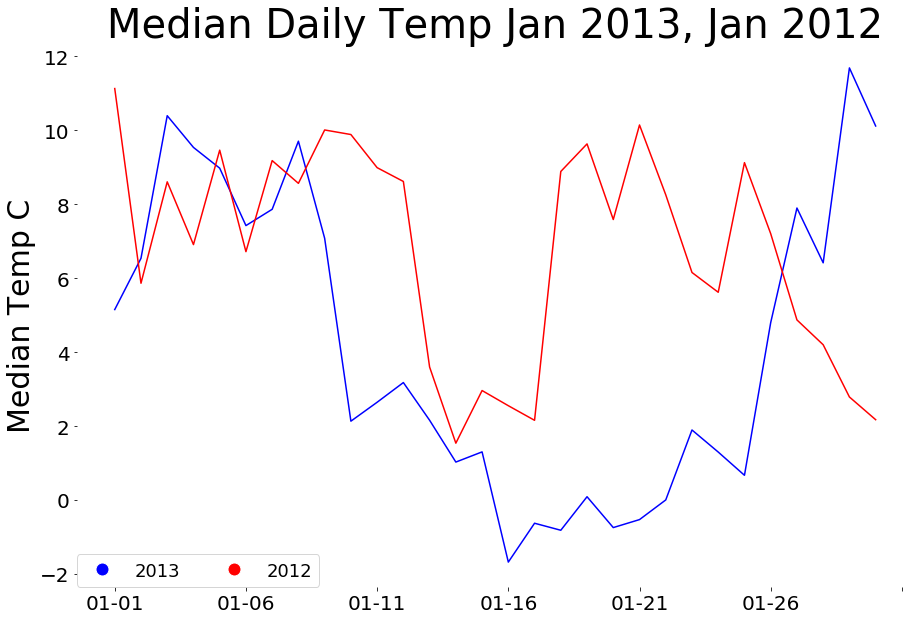

In [417]:
fig,ax = plt.subplots(nrows=1, ncols=1,sharex=True,sharey=True)

#df1.plot(ax=axes[0,0])
#df2.plot(ax=axes[0,1])



#jan2014.plot(x='datetime',y='temp',figsize=(15,10),color = ['r'],legend=False)
jan2013.plot(x='datetime',y='temp',figsize=(15,10),color = ['b'],legend=False)
#jan2013.plot(x='datetime',y='temp',ax=ax,color = ['g'],legend=False)
jan2012.plot(x='datetime',y='temp',ax=ax,color = ['r'],legend=False)

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.title('Median Daily Temp Jan 2013, Jan 2012', size = 40)
plt.xlabel('', size =30)
plt.ylabel('Median Temp C',size=30)

plt.xticks(size = 20)
plt.yticks(size = 20) 
line1 = Line2D(range(1), range(1), color="white", marker='o', markersize=13,markerfacecolor="blue")
line2 = Line2D(range(1), range(1), color="white", marker='o', markersize=13,markerfacecolor="red")
#line3 = Line2D(range(1), range(1), color="white", marker='o', markersize=13,markerfacecolor="red")

plt.legend((line1,line2),('2013','2012'),numpoints=1,prop={'size': 18},loc=3,
           ncol=2, borderaxespad=0.)

#ax.legend(bbox_to_anchor=(9.1, 9.05))
#ax.add_artist(legend1)
plt.show()

In [305]:
kwhh_tot_by_day = pd.read_csv('total_kwhh_by_date.csv',names=['date','kwhh'],skiprows=1,header=None)
                              

In [307]:
kwhh_tot_by_day.sort_values('kwhh',ascending=False)

,date,kwhh
424,2013-01-20,82650.492287
423,2013-01-19,80900.962952
422,2013-01-18,77294.252104
487,2013-03-24,76861.657292
459,2013-02-24,76489.948412
375,2012-12-02,75819.444886
417,2013-01-13,75265.224241
425,2013-01-21,75034.144849
445,2013-02-10,74558.538826
426,2013-01-22,74398.342414


In [44]:
#dask_big_frame_grouped_by_mac.csv
mac_kwhh_tot = pd.read_csv('dsk_big_frame_grouped_by_mac.csv',names=['mac','kwhh'],skiprows=1,header=None)

In [45]:
mac_kwhh_tot.info()
mac_kwhh_tot.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5561 entries, 0 to 5560
Data columns (total 2 columns):
mac     5561 non-null object
kwhh    5561 non-null float64
dtypes: float64(1), object(1)
memory usage: 87.0+ KB


,mac,kwhh
0,MAC000002,6095.672001
1,MAC000003,14080.862003
2,MAC000004,1119.839000
3,MAC000005,2911.006000
4,MAC000006,2167.448000


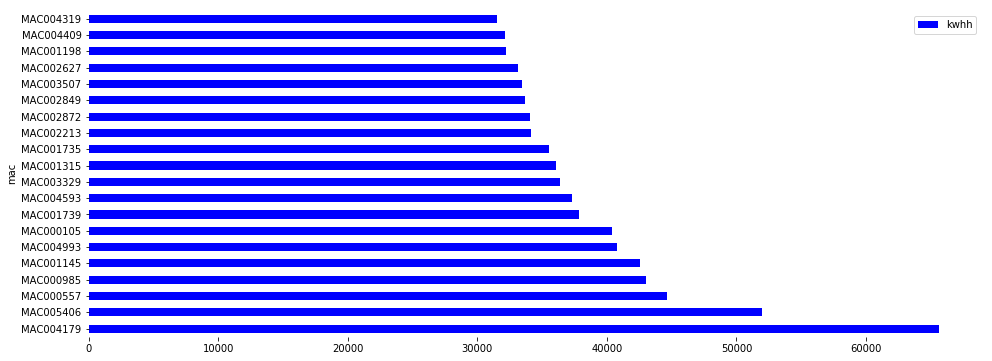

In [46]:
mac_kwhh_tot.sort_values('kwhh',ascending=False)[:20].plot(x='mac', kind='barh',figsize=[16,6], colormap='winter')
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

In [47]:
mac_kwhh_tot.sort_values('kwhh',ascending=False)[:5]

,mac,kwhh
4176,MAC004179,65623.649002
5403,MAC005406,51950.872009
555,MAC000557,44660.903009
983,MAC000985,43031.147995
1143,MAC001145,42592.305990


In [63]:
#lets make a dataframe of the top 5 and bottom 5 users
topandbottom= mac_kwhh_tot.sort_values('kwhh',ascending=False)[:5]
#ok bottom users are way to low lets pick some people that are still low but have more usage 
topandbottom = topandbottom.append(mac_kwhh_tot.sort_values('kwhh',ascending=False)[-500:-495])


In [68]:
macinfo = pd.read_csv("informations_household_update.csv",
                     skip_blank_lines=True
                    )
topandbottom = topandbottom.join(macinfo.set_index('LCLid'), on='mac')

In [74]:
topandbottom["label"] = (topandbottom["mac"].map(str) + ' ' + topandbottom["Acorn_grouped"]).str.wrap(11)

In [75]:
topandbottom

,mac,kwhh,stdorToU,Acorn,Acorn_grouped,file,label
4176,MAC004179,65623.649002,Std,ACORN-A,Affluent,block_8,MAC004179\nAffluent
5403,MAC005406,51950.872009,Std,ACORN-A,Affluent,block_11,MAC005406\nAffluent
555,MAC000557,44660.903009,Std,ACORN-A,Affluent,block_1,MAC000557\nAffluent
983,MAC000985,43031.147995,ToU,ACORN-D,Affluent,block_11,MAC000985\nAffluent
1143,MAC001145,42592.305990,Std,ACORN-A,Affluent,block_2,MAC001145\nAffluent
582,MAC000584,2048.740000,ToU,ACORN-J,Comfortable,block_11,MAC000584\nComfortable
3905,MAC003908,2044.223000,Std,ACORN-B,Affluent,block_7,MAC003908\nAffluent
4813,MAC004816,2040.946000,Std,ACORN-Q,Adversity,block_9,MAC004816\nAdversity
4681,MAC004684,2040.590000,Std,ACORN-Q,Adversity,block_9,MAC004684\nAdversity
3950,MAC003953,2040.387998,Std,ACORN-E,Affluent,block_8,MAC003953\nAffluent


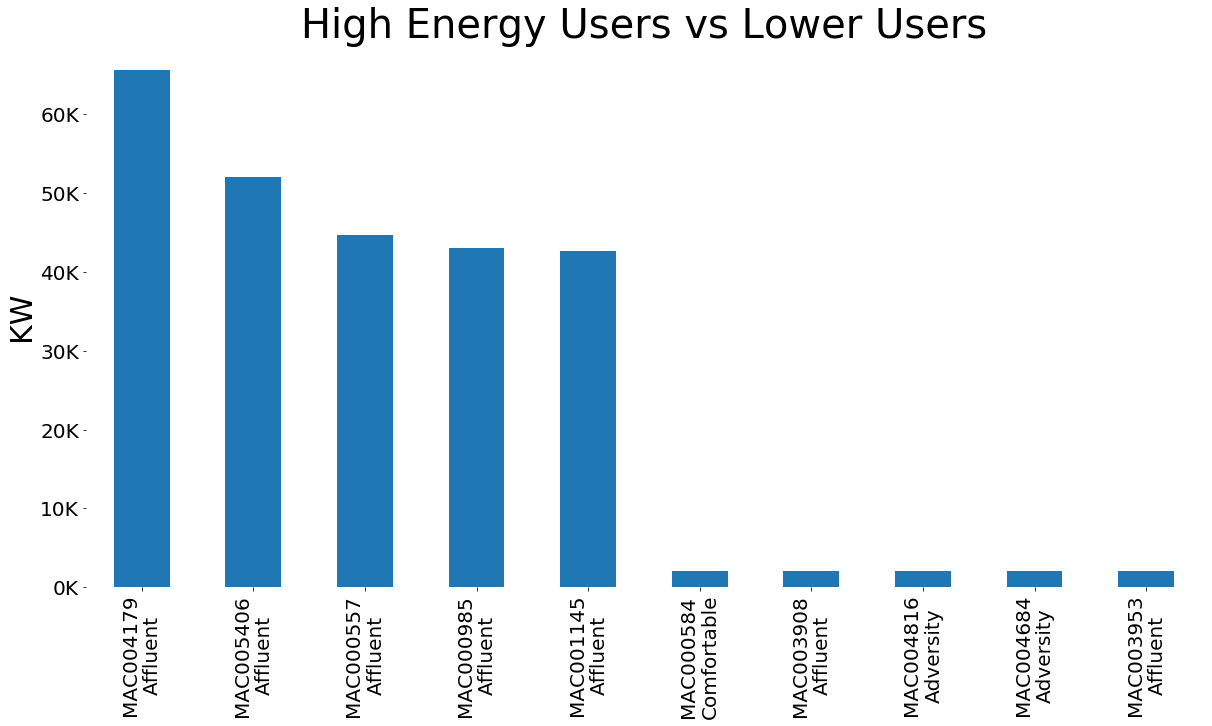

In [76]:
def makeabbrev(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '{:1.1f}M'.format(x*1e-6)
    return '{:1.0f}K'.format(x*1e-3)

formatter = FuncFormatter(makeabbrev)

ax = topandbottom.plot(x='label',kind='bar',figsize=(20,10),legend=False,)
ax.yaxis.set_major_formatter(formatter)  # set formatter to needed axis
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xlabel('', size =30)
plt.ylabel('KW', size = 30)
plt.title('High Energy Users vs Lower Users', size = 40)
plt.xticks(size = 20)
plt.yticks(size = 20) 
plt.show()

In [239]:
#dfMAC004179 = pd.read_csv('dfMAC004179.csv',names=['mac','datetime','kwhh'],parse_dates=['datetime'],skiprows=1,header=None)
dfMAC004179 = pd.read_csv('dfMAC004179.csv',parse_dates=['datetime'],index_col=0) #affulent
dfMAC000985 = pd.read_csv('dfMAC000985.csv',parse_dates=['datetime']) #affulent
dfMAC000584 = pd.read_csv('dfMAC000584.csv',parse_dates=['datetime']) #comfortable
dfMAC004684 = pd.read_csv('dfMAC004684.csv',parse_dates=['datetime']) #adversity

dfMAC004179['day']= dfMAC004179['datetime'].dt.to_period("D")
dfMAC000985['day']= dfMAC000985['datetime'].dt.to_period("D")
dfMAC000584['day']= dfMAC000584['datetime'].dt.to_period("D")
dfMAC004684['day']= dfMAC004684['datetime'].dt.to_period("D")

dfMAC004179 =  dfMAC004179.groupby(['mac','day'],as_index=False)['kwhh'].sum()
dfMAC000985 =  dfMAC000985.groupby(['mac','day'],as_index=False)['kwhh'].sum()
dfMAC000584 =  dfMAC000584.groupby(['mac','day'],as_index=False)['kwhh'].sum()
dfMAC004684 =  dfMAC004684.groupby(['mac','day'],as_index=False)['kwhh'].sum()

#dfMAC004179 = dfMAC004179.groupby([dfMAC004179['mac'],dfMAC004179['datetime'].dt.date],as_index=False)['kwhh'].sum()
#dfMAC000985 = dfMAC000985.groupby([dfMAC000985['mac'],dfMAC000985['datetime'].dt.date],as_index=False)['kwhh'].sum()
#dfMAC000584 = dfMAC000584.groupby([dfMAC000584['mac'],dfMAC000584['datetime'].dt.date],as_index=False)['kwhh'].sum()
#dfMAC004684 = dfMAC004684.groupby([dfMAC004684['mac'],dfMAC004684['datetime'].dt.date],as_index=False)['kwhh'].sum()


In [215]:
dfMAC004179.info()
dfMAC000985.info()
dfMAC000584.info()
dfMAC004684.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 648
Data columns (total 1 columns):
kwhh    649 non-null float64
dtypes: float64(1)
memory usage: 10.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 2 columns):
mac     668 non-null object
kwhh    668 non-null float64
dtypes: float64(1), object(1)
memory usage: 15.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 687
Data columns (total 2 columns):
mac     688 non-null object
kwhh    688 non-null float64
dtypes: float64(1), object(1)
memory usage: 16.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 0 to 594
Data columns (total 2 columns):
mac     595 non-null object
kwhh    595 non-null float64
dtypes: float64(1), object(1)
memory usage: 13.9+ KB


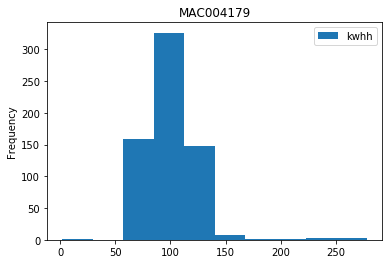

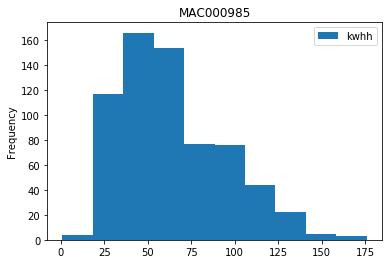

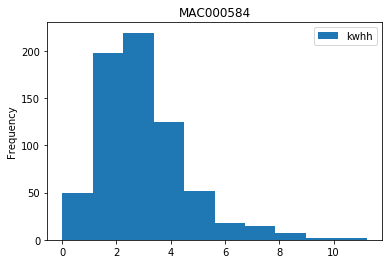

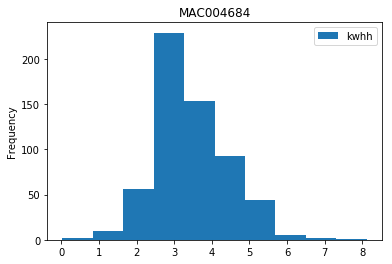

In [303]:
dfMAC004179.plot.hist(title='MAC004179')
dfMAC000985.plot.hist(title='MAC000985')
dfMAC000584.plot.hist(title='MAC000584')
dfMAC004684.plot.hist(title='MAC004684')

plt.show()

In [240]:
dfMAC004179

,mac,day,kwhh
0,MAC004179,2012-05-21,60.825999
1,MAC004179,2012-05-22,92.368000
2,MAC004179,2012-05-23,86.382000
3,MAC004179,2012-05-24,80.167000
4,MAC004179,2012-05-25,74.657000
5,MAC004179,2012-05-26,71.556000
6,MAC004179,2012-05-27,80.105000
7,MAC004179,2012-05-28,84.871000
8,MAC004179,2012-05-29,73.165000
9,MAC004179,2012-05-30,67.194000


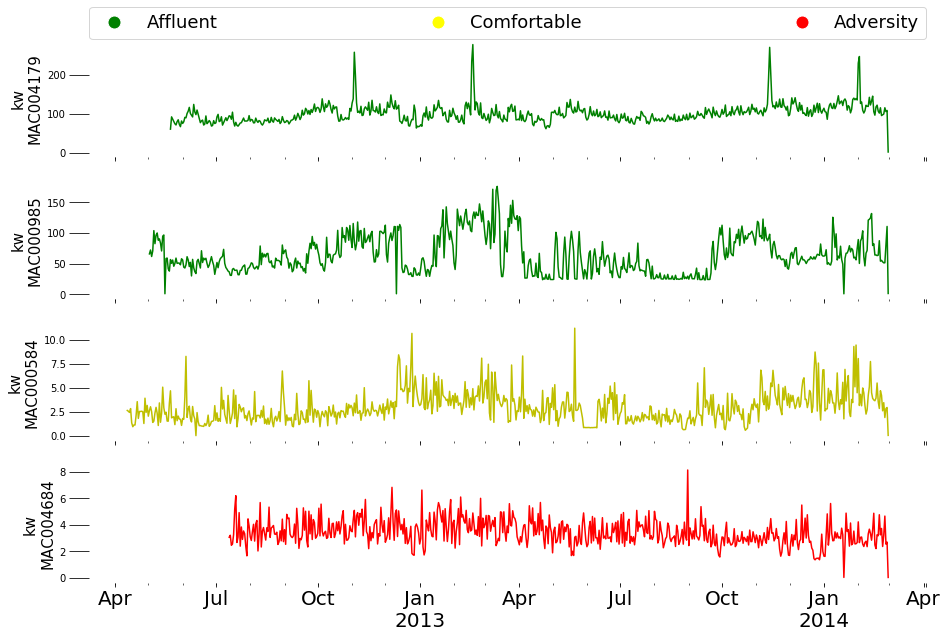

In [291]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
def makeabbrev(x, pos):
    'The two args are the value and tick position'
    return '{:1.0f}K'.format(x*1e-3)

formatter = FuncFormatter(makeabbrev)

#ax = dfMAC004179.plot.area(x='datetime',y='kwhh',stacked=False,figsize=(15,10))
#dfMAC000985.plot.area(x='datetime',y='kwhh',ax=ax,stacked=False)
fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=4, ncols=1,sharex=True)

#df1.plot(ax=axes[0,0])
#df2.plot(ax=axes[0,1])



dfMAC004179.plot(x='day',y='kwhh',figsize=(15,10),ax=ax1,color = ['g'],legend=False)
dfMAC000985.plot(x='day',y='kwhh',ax=ax2,color = ['g'],legend=False)
dfMAC000584.plot(x='day',y='kwhh',ax=ax3,color = ['y'],legend=False)
dfMAC004684.plot(x='day',y='kwhh',ax=ax4,color = ['r'],legend=False)


#plt.ticklabel_format(useOffset=False)
#ax1.formatter.useoffset
#ax1.yaxis.set_major_formatter().set_useOffset(False) # set formatter to needed axis
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False) 
ax2.spines['left'].set_visible(False) 

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)    
ax1.spines['bottom'].set_visible(False) 
ax1.spines['left'].set_visible(False)  

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)    
ax3.spines['bottom'].set_visible(False) 
ax3.spines['left'].set_visible(False)  

ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)    
ax4.spines['bottom'].set_visible(False) 
ax4.spines['left'].set_visible(False)  

ax1.set_ylabel('kw\nMAC004179',size =15)
ax2.set_ylabel('kw\nMAC000985',size =15)
ax3.set_ylabel('kw\nMAC000584',size =15)
ax4.set_ylabel('kw\nMAC004684',size =15)


#ax1.right_ax.yaxis.set_major_formatter(formatter)

#ax1.yaxis.set_major_formatter(formatter)  # set formatter to needed axis
#ax2.yaxis.set_major_formatter(formatter)  # set formatter to needed axis
#ax3.yaxis.set_major_formatter(formatter)  # set formatter to needed axis
#ax4.yaxis.set_major_formatter(formatter)  # set formatter to needed axis

ax1.tick_params('y',size=20)
ax2.tick_params('y',size=20)
ax3.tick_params('y',size=20)
ax4.tick_params('y',size=20)
#plt.tick_params(axis='both', which='major', labelsize=22)
#ax1.set_xticks(size = 15)
#ax1.set_yticks(size =30)
#fig = plt.pyplot.gcf()
#fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
#plt.title('Energy Usage By Acorn Group', size = 40)
plt.xlabel('', size =30)
#plt.ylabel('KW')
#plt.title('Daily Energy Usage High and Low Acorn Group', size = 40)
plt.xticks(size = 20)
#plt.yticks(size = 20) 

line1 = Line2D(range(1), range(1), color="white", marker='o', markersize=13,markerfacecolor="green")
line2 = Line2D(range(1), range(1), color="white", marker='o', markersize=13,markerfacecolor="yellow")
line3 = Line2D(range(1), range(1), color="white", marker='o', markersize=13,markerfacecolor="red")

plt.legend((line1,line2,line3),('Affluent','Comfortable', 'Adversity'),numpoints=1,prop={'size': 18},bbox_to_anchor=(0., 4.6, 1., .102), loc=8,
           ncol=3, mode="expand", borderaxespad=0.)
#ax.legend(bbox_to_anchor=(9.1, 9.05))
#ax.add_artist(legend1)
plt.show()